Compare a single cast from IOS observations to model.

IOS observations span many years. So, cbservations with model on day of, 7 days before and 7 days after. This can account for spring/neap variability but not interannual variabilty in discharge, winds, etc

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ACTDR
import netCDF4 as nc
from salishsea_tools import viz_tools
import numpy as np
import datetime
from salishsea_tools import tidetools

import comparisons

%matplotlib inline

In [36]:
sns.set_style('darkgrid')

In [37]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
paths = {'nowcast': '/data/dlatorne/MEOPAR/SalishSea/nowcast/',
        'spinup': '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/'}


In [38]:
ACTDR.load_dat('SOG_2000.dat')

> open  SOG_2000.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG_2000.dat
> complete


In [39]:
data = pd.DataFrame(ACTDR.CTD_DAT)

lon_min=-124.6; lat_min=48;
lon_max=-123.6; lat_max=48.6;

data_region = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

(48, 48.6)

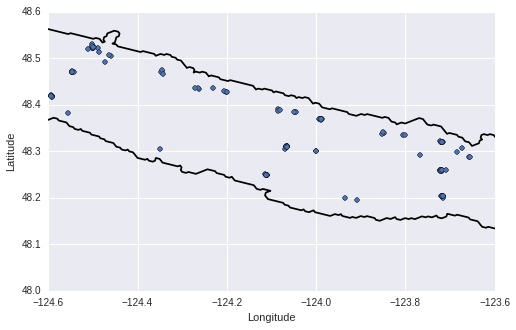

In [40]:
fig,axm = plt.subplots(1,figsize=(8,5))
data_region.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([lon_min,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9621d13590>]], dtype=object)

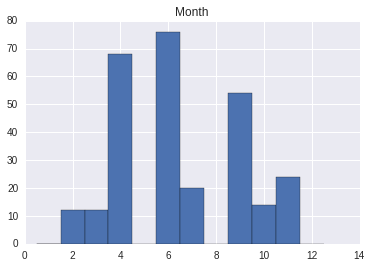

In [41]:
data_region.hist('Month',bins=np.arange(0.5,13.5))

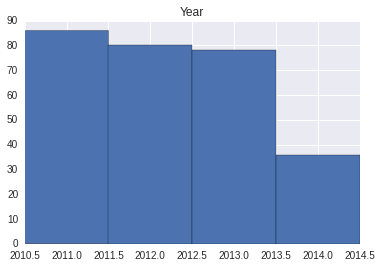

In [42]:
data_region.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

#Subdivide into regions

##Eastern

(48, 48.6)

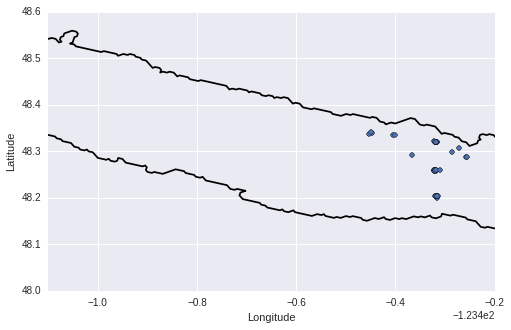

In [43]:
lon_min=-123.9; lat_min=48;
lon_max=-123.6; lat_max=48.6;

data_east = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_east.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,lon_max])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9620b6e750>]], dtype=object)

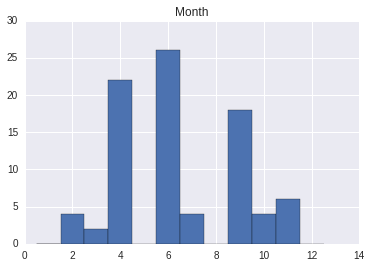

In [44]:
data_east.hist('Month',bins=np.arange(0.5,13.5))

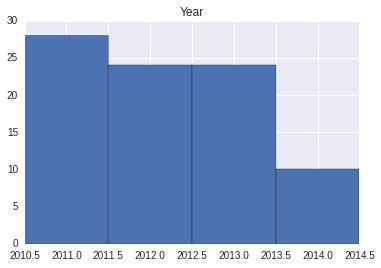

In [45]:
data_east.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

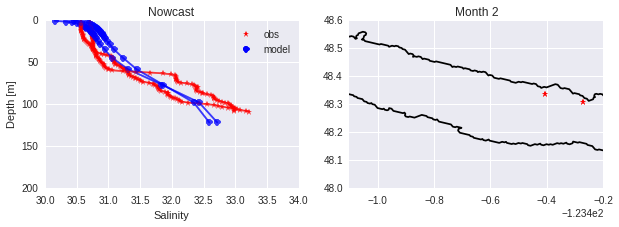

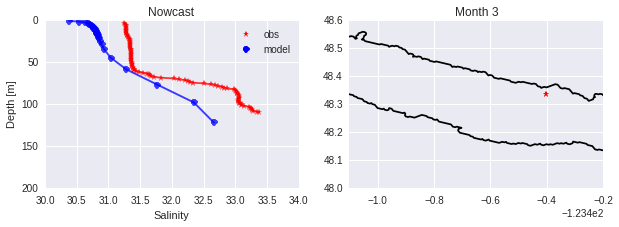

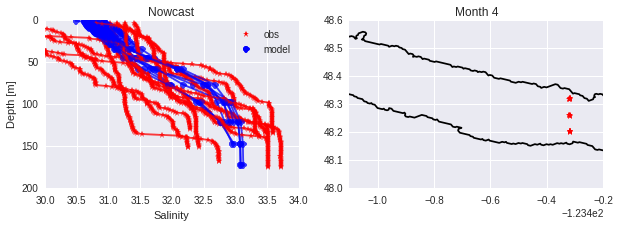

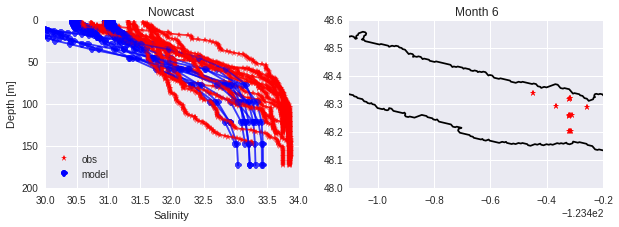

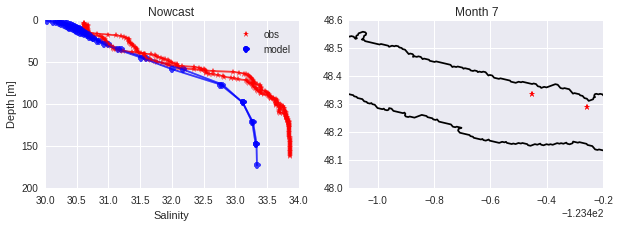

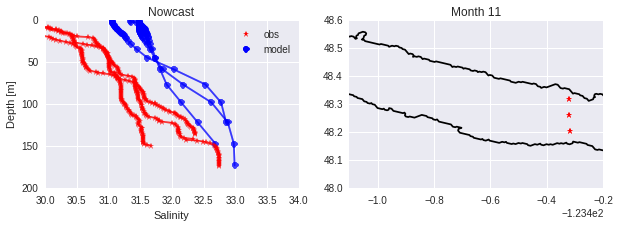

In [46]:
zmax= 200
grouped = data_east.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,
                                            vmax=34, xmin=-124.5,xmax=lon_max,ymin=lat_min,ymax=lat_max)

##Central

(48, 48.6)

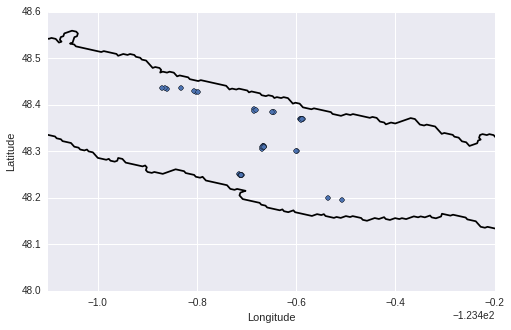

In [47]:
lon_min=-124.3; lat_min=48;
lon_max=-123.9; lat_max=48.6;

data_central = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_central.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,-123.6])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96223bf610>]], dtype=object)

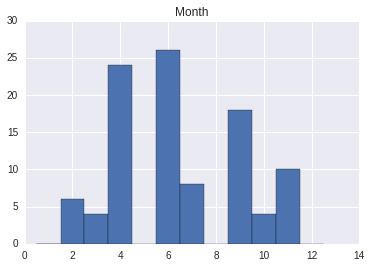

In [48]:
data_central.hist('Month',bins=np.arange(0.5,13.5))

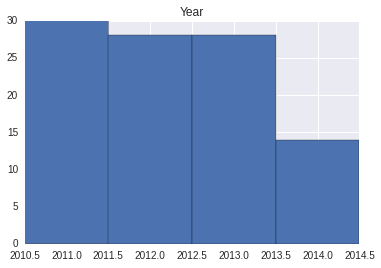

In [49]:
data_central.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

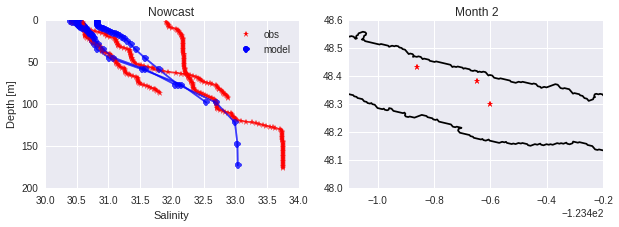

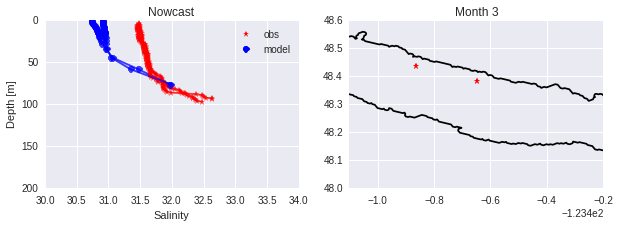

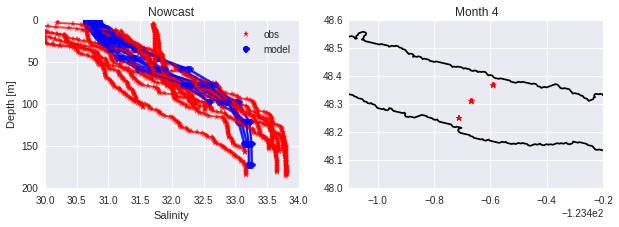

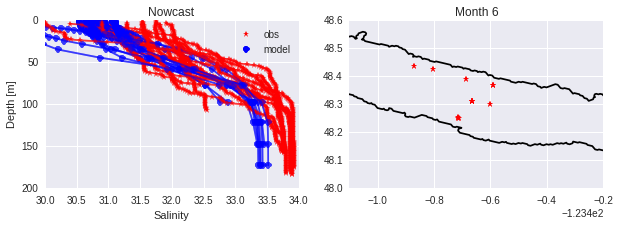

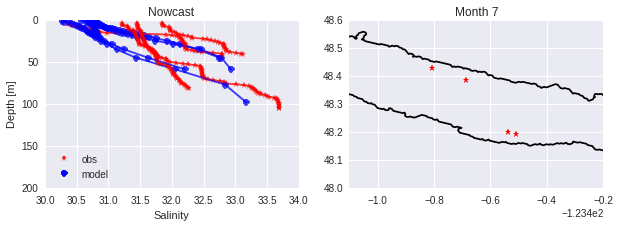

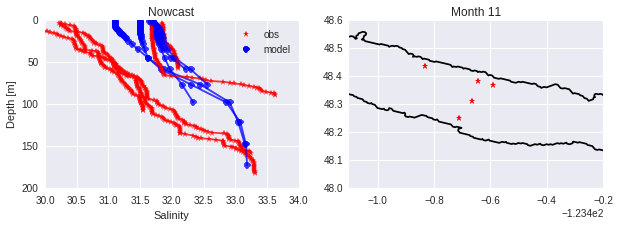

In [50]:
zmax= 200
grouped = data_central.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_central,paths['nowcast'],zmax=zmax,vmin=30,
                                            vmax=34, xmin=-124.5,xmax=-123.6,ymin=lat_min,ymax=lat_max)

##West

(48, 48.6)

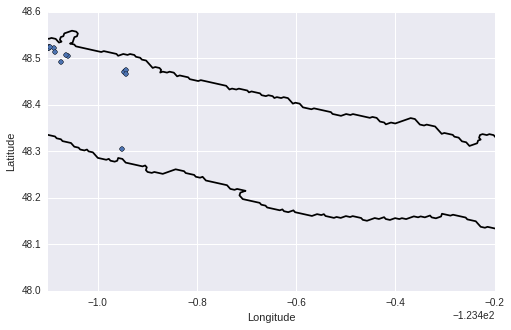

In [51]:
lon_min=-124.5; lat_min=48;
lon_max=-124.3; lat_max=48.6;

data_west = comparisons.isolate_region(data, lon_min, lon_max, lat_min, lat_max)

fig,axm = plt.subplots(1,figsize=(8,5))
data_west.plot(x='Longitude',y='Latitude',kind='scatter', marker='o',ax=axm)
viz_tools.plot_coastline(axm,grid_B,coords='map')
axm.set_xlim([-124.5,-123.6])
axm.set_ylim([lat_min, lat_max])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9621bac110>]], dtype=object)

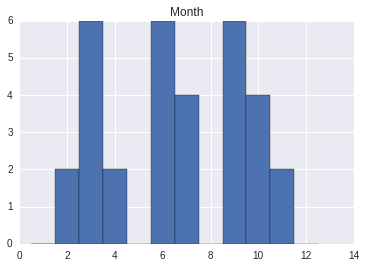

In [52]:
data_west.hist('Month',bins=np.arange(0.5,13.5))

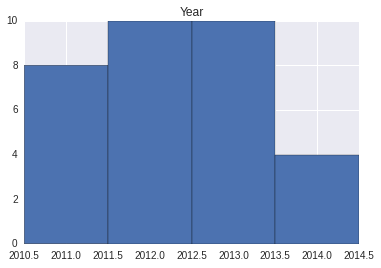

In [53]:
data_west.hist('Year', bins= np.arange(data_region['Year'].min()-0.5, data_region['Year'].max() +1.5 ))
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

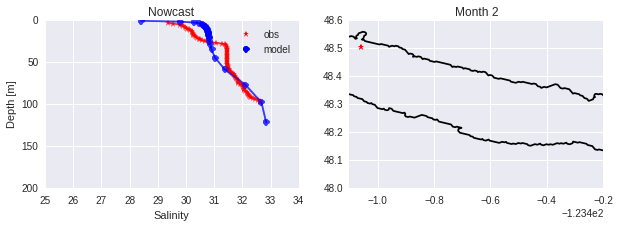

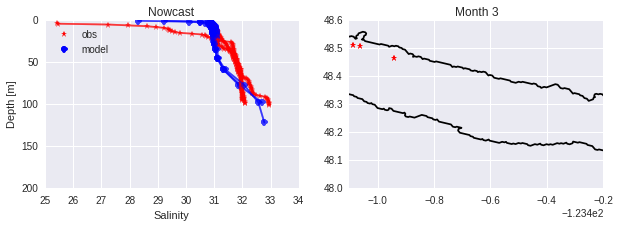

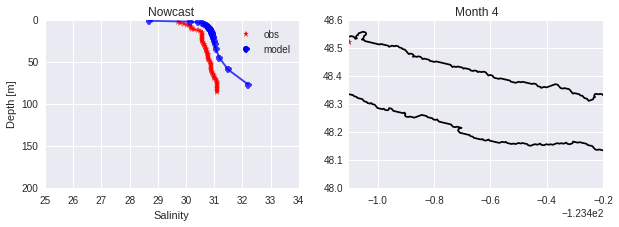

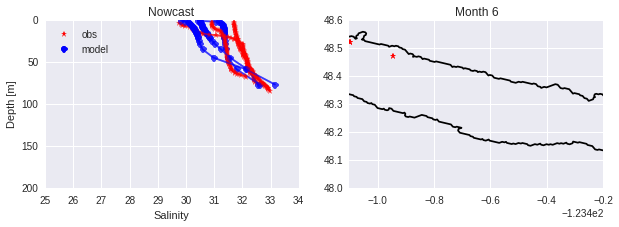

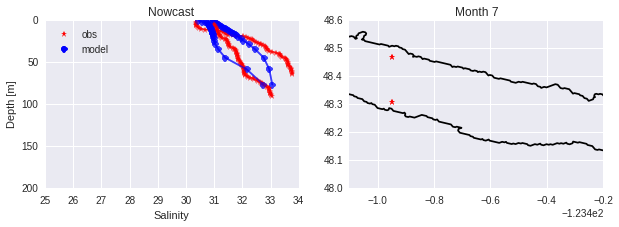

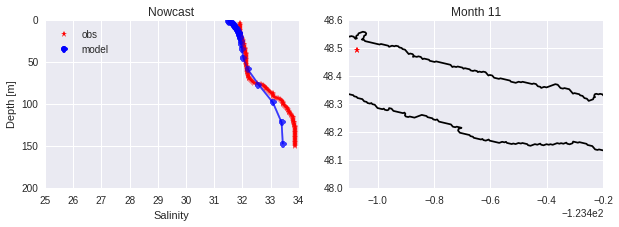

In [54]:
zmax= 200
grouped = data_west.groupby('Month')
for month in grouped.groups.keys():
    if month != 8 and month != 9 and month != 10: 
        if month ==11 or month ==12:
            model_year=2014
        else:
            model_year=2015
        fig = comparisons.compare_model_obs(month,model_year,'Salinity',data_west,paths['nowcast'],zmax=zmax,vmin=25,
                                            vmax=34, xmin=-124.5,xmax=-123.6,ymin=lat_min,ymax=lat_max)

These comparisons are still difficult. Let's separate each cast out. Focus on the eastern Juan de Fuca region.

#Cast by cast comparison, organized by month 

## Eastern Region

Question - Are we too salty in the surface?

Plot 7 days before and after cast yeardate to attempt to capture spring/neap variability.

###Nowcasts


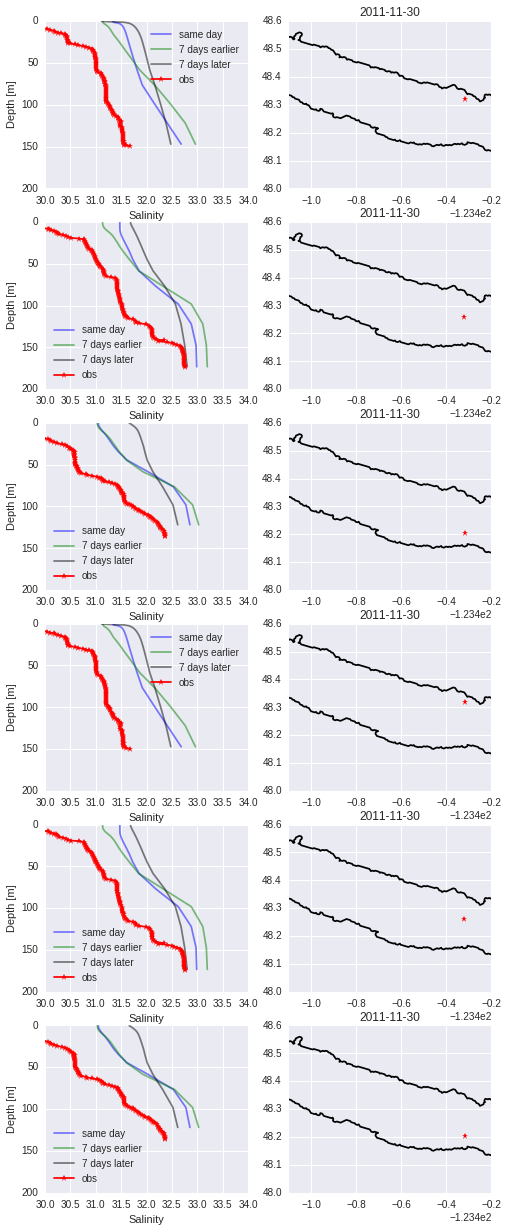

In [55]:
month = 11
xmin=-124.5; xmax=-123.6 
fig=comparisons.compare_cast_model(month,2014,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Model is saliter everywhere.
* Note: all of this data was from 2011, a high flow year. Does that matter for the Strait of Juan de Fuca?

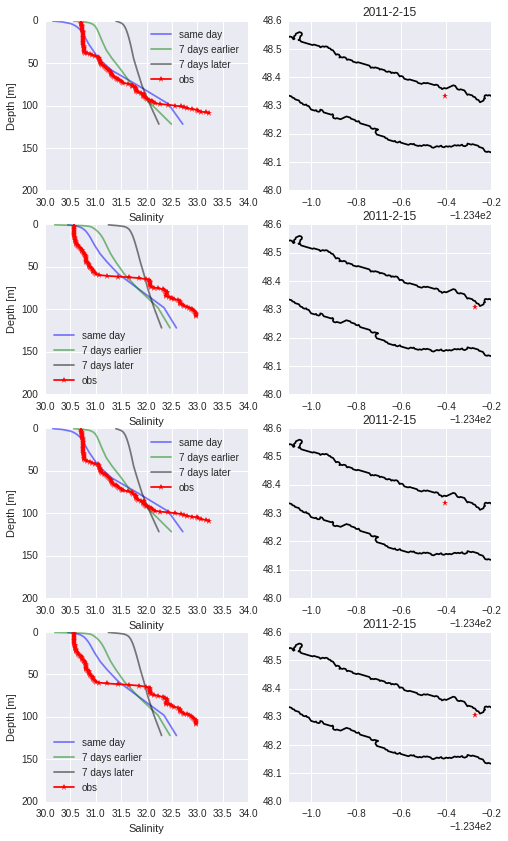

In [56]:
month = 2
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

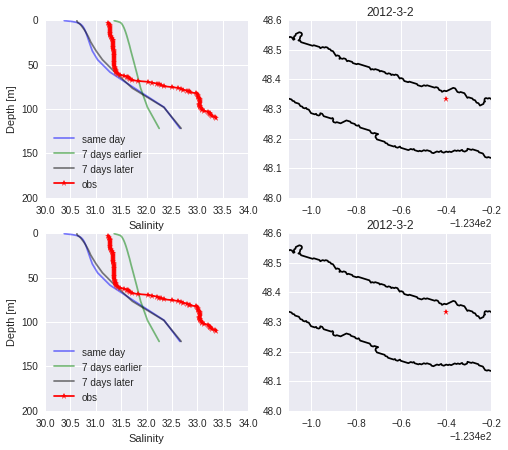

In [57]:
month = 3
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

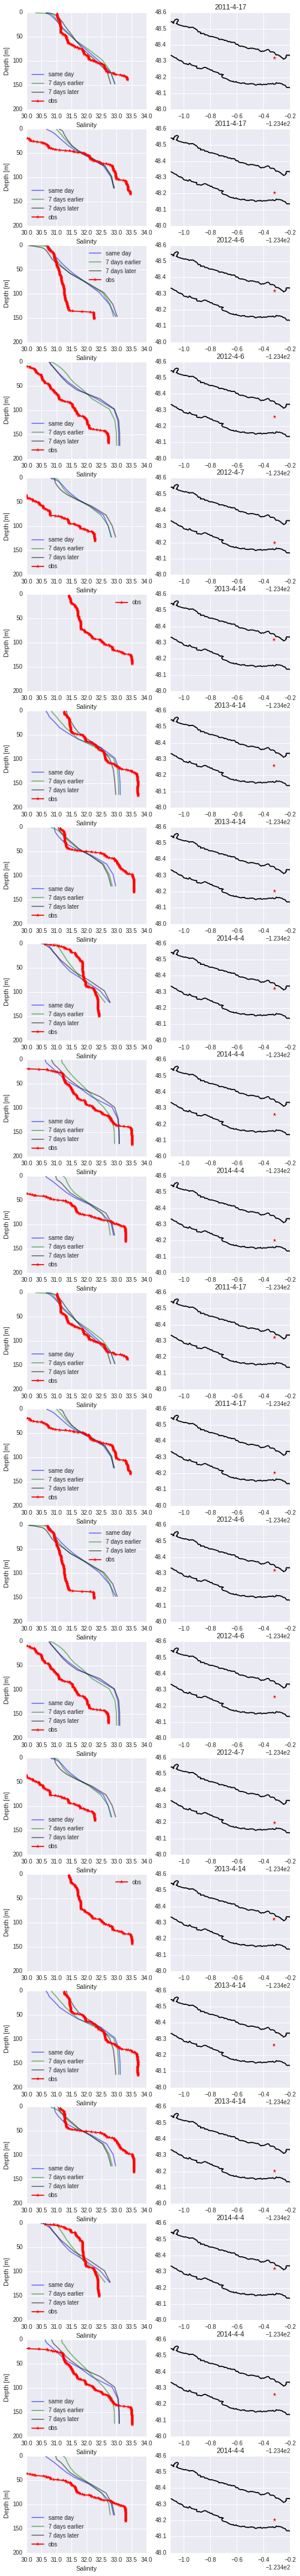

In [58]:
month = 4
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Some variability in these comparisons, but there is some consitency within a given year. 
* 2012: Model is saltier everwhere
* 2014: Model surface is usually salter. Observed surface waters has more varibiality than the model across the Strait. 

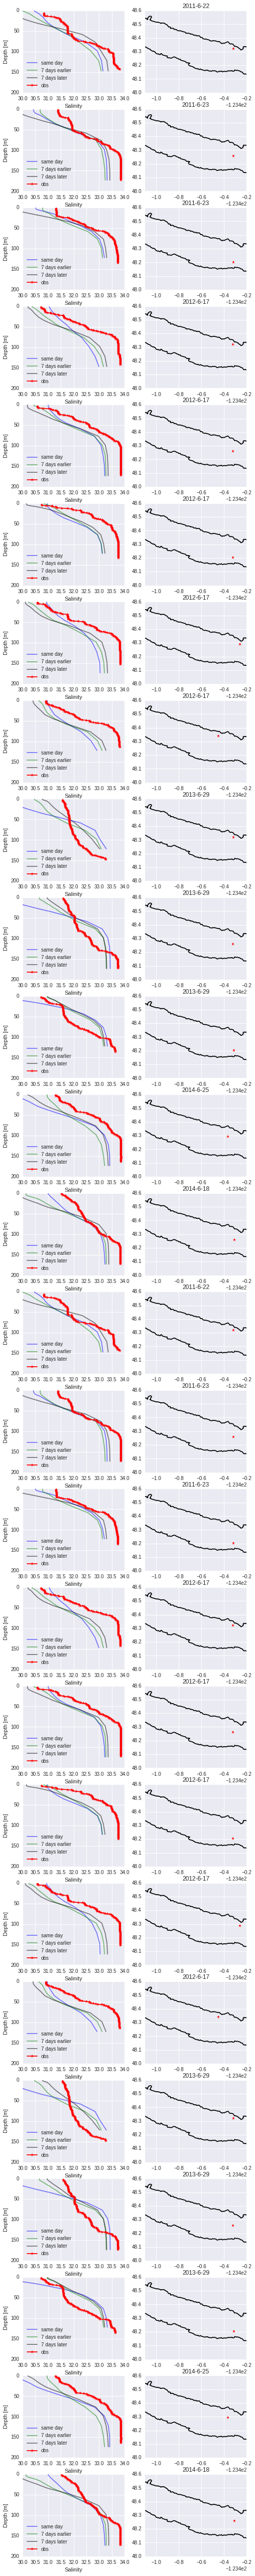

In [59]:
month = 6
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

* Model surface consistently fresher. But 2015 is a strange flow year. There was a large peak in Fraser discharge in April. 
* Model deep is consistently fresher. 

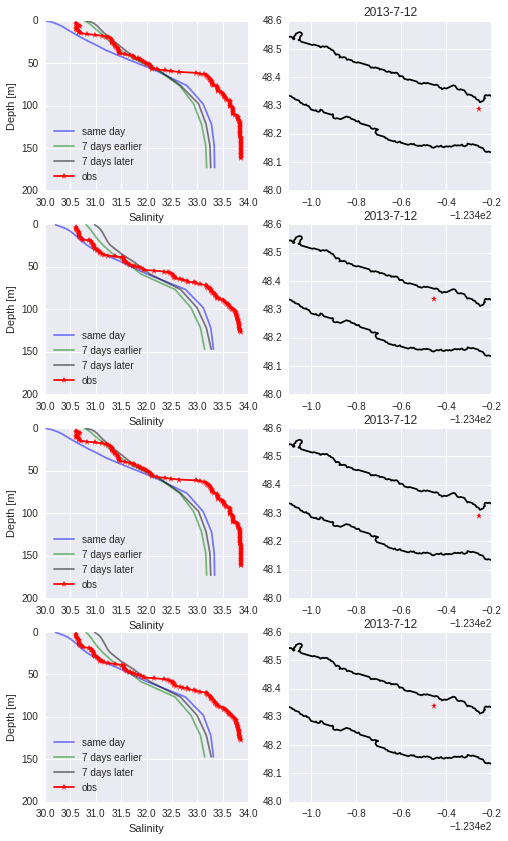

In [60]:
month = 7
fig=comparisons.compare_cast_model(month,2015,'Salinity',data_east,paths['nowcast'],zmax=zmax,vmin=30,vmax=34,
                                  xmin=xmin,xmax=xmax,ymin=lat_min,ymax=lat_max)

Model deep is consistently fresher.

#Summary

* Does the interannual variability of the Fraser River discharge affect the surface salinty in the Strait of Juan de Fuca? I see quite a lot of variablity in the observed JdF surface waters. Is this because of discharge or spring/neap tides. 

* Ideally, we would have time overlap in model/data comparisons.

I'm struggling to find a consistent trend but will attempt to summarize the eastern region.

* June -  model fresher in most comparisons at most depths (possible explanation is the 2015 freshet)
* Spring 2012 - model saltier in April
* November 2011 - model saltier in all comparisons at all depths (possible explanation is the large 2011 discharge)

I was expecting to see a consistently saltier model in the surface waters (because of too much mixing) but didn't. Why?
* I could probably write some functions to confirm this, but here is what I think I see
   * In a given year and month, if model surface waters are saltier/fresher for one cast then they are like that for all casts. (However, the casts closest to northern shore don't always follow this trend).
   * This suggests that salinity of the eastern JdF surface water is directly linked to the discharge properties of that year.
   * Comparisons between the model and observations over different years are inconclusive. I cannot make a convincing argument that the model is too fresh in the SJdF waters using this data set. 
   


##Next

* Wait for Fall 2014 data? 
* Orignially, I though there would be less variability in the SJDF observations but I'm not finding that to be the case.